In [1]:
import os, sys, pdb
from pathlib import Path
import pandas as pd
import numpy as np
seed = 0
np.random.seed(seed)
import matplotlib.pyplot as plt
import time
import copy
import gc
%matplotlib inline
%load_ext autoreload
%autoreload 1
DATA_DIR = Path('../input')
MODEL_DIR = Path('../model')
OUT_DIR = Path('../output')
import warnings
warnings.filterwarnings('ignore')

In [2]:
# DATA_DIR = Path(__file__()).resolve().parent[1] / 'input'
# MODEL_DIR = Path(__file__()).resolve().parent[1] / 'model'
# OUT_DIR = Path(__file__()).resolve().parent[1] / 'output'

In [3]:
ls ../input

cinc/                    test_manifest.csv      val_manifest.csv
db1-5/                   test_manifest.csv_01   val_manifest.csv_01
db15_devel_manifest.csv  test_manifest_01.csv   val_manifest_01.csv
db15_test_manifest.csv   test_manifest_02.csv   val_manifest_02.csv
db15_train_manifest.csv  train_manifest.csv     wav/
lab/                     train_manifest_01.csv
processed/               train_manifest_02.csv


In [4]:
ls ../input/lab/

labels_test.arff  labels_test.txt  labels_train_dev.tsv


In [5]:
ls ../input/wav/

devel_0001.wav  devel_0170.wav  test_0159.wav   train_0165.wav  train_0334.wav
devel_0002.wav  devel_0171.wav  test_0160.wav   train_0166.wav  train_0335.wav
devel_0003.wav  devel_0172.wav  test_0161.wav   train_0167.wav  train_0336.wav
devel_0004.wav  devel_0173.wav  test_0162.wav   train_0168.wav  train_0337.wav
devel_0005.wav  devel_0174.wav  test_0163.wav   train_0169.wav  train_0338.wav
devel_0006.wav  devel_0175.wav  train_0001.wav  train_0170.wav  train_0339.wav
devel_0007.wav  devel_0176.wav  train_0002.wav  train_0171.wav  train_0340.wav
devel_0008.wav  devel_0177.wav  train_0003.wav  train_0172.wav  train_0341.wav
devel_0009.wav  devel_0178.wav  train_0004.wav  train_0173.wav  train_0342.wav
devel_0010.wav  devel_0179.wav  train_0005.wav  train_0174.wav  train_0343.wav
devel_0011.wav  devel_0180.wav  train_0006.wav  train_0175.wav  train_0344.wav
devel_0012.wav  test_0001.wav   train_0007.wav  train_0176.wav  train_0345.wav
devel_0013.wav  test_0002.wav   train_0008.wav  trai

In [6]:
train_dev_label = pd.read_csv(DATA_DIR / 'lab' / 'labels_train_dev.tsv', sep='\t')
train_dev_label.head()

,file_name,label
0,train_0001.wav,2
1,train_0002.wav,0
2,train_0003.wav,1
3,train_0004.wav,2
4,train_0005.wav,2


In [7]:
dic = {}
for phase in ['train', 'devel', 'test']:
    dic[phase] = [str(p.resolve()) for p in (DATA_DIR / 'wav').iterdir() if phase in p.name]
    dic[phase].sort()

In [8]:
train = pd.read_csv(DATA_DIR / 'db15_train_manifest.csv', header=None)


In [9]:
train.head()

,0,1
0,/home/tomoya/workspace/research/heart-sound-ma...,2
1,/home/tomoya/workspace/research/heart-sound-ma...,2
2,/home/tomoya/workspace/research/heart-sound-ma...,2
3,/home/tomoya/workspace/research/heart-sound-ma...,2
4,/home/tomoya/workspace/research/heart-sound-ma...,2


In [10]:
path = train.iloc[0, 0]
path

'/home/tomoya/workspace/research/heart-sound-machine/input/db1-5/wav/train_0001_1.wav'

In [11]:
from librosa.core import load

In [12]:
wave, sr = load(path, sr=4000)
wave

array([-0.02627563, -0.02386475, -0.01989746, ..., -0.01312256,
       -0.01193237, -0.01351929], dtype=float32)

In [13]:
wave.shape

(40000,)

In [14]:
from ml.src.signal_processor import cwt, to_spect, logmel

In [15]:
_ = cwt(wave.reshape((1, -1)))

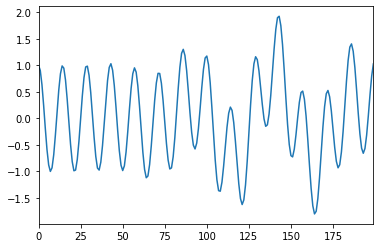

In [16]:
import matplotlib.pyplot as plt
from scipy import signal
import seaborn as sns
t = np.linspace(-1, 1, 200, endpoint=False)
sig  = np.cos(2 * np.pi * 7 * t) + signal.gausspulse(t - 0.4, fc=2)
pd.Series(sig).plot()

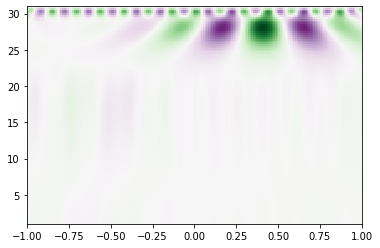

In [17]:
widths = np.arange(1, 121)
cwtmatr = signal.cwt(sig, signal.ricker, widths=widths)
plt.imshow(cwtmatr, extent=[-1, 1, 1, 31], cmap='PRGn', aspect='auto',
            vmax=abs(cwtmatr).max(), vmin=-abs(cwtmatr).max())
plt.show()

In [18]:
!pip install seaborn

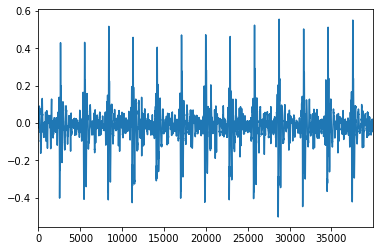

In [19]:
pd.Series(wave).plot()

In [20]:
wave

array([-0.02627563, -0.02386475, -0.01989746, ..., -0.01312256,
       -0.01193237, -0.01351929], dtype=float32)

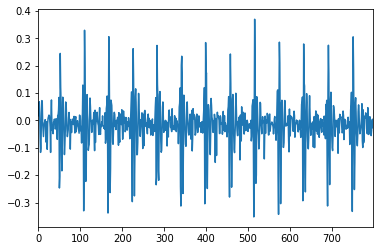

In [21]:
pd.Series(wave.reshape((-1, 50)).mean(axis=1)).plot()

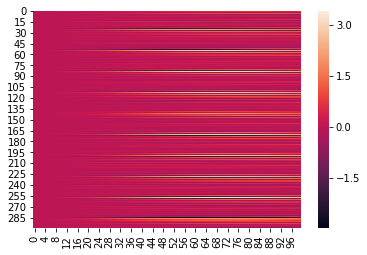

In [22]:
sns.heatmap(cwt(wave[:30000].reshape((1, -1)), np.arange(1, 101))[0].numpy())

In [23]:
cwt(wave[:30000].reshape((1, -1)), np.arange(1, 101))[0].numpy()

array([[-2.29629310e-04, -6.43508451e-04, -1.08766358e-03, ...,
         6.30707979e-01,  6.38702452e-01,  6.46370173e-01],
       [ 1.76257920e-04,  8.62859772e-04,  1.99625688e-03, ...,
         5.40523887e-01,  5.31758487e-01,  5.22813976e-01],
       [-1.48051535e-04, -6.64723455e-04, -1.43687753e-03, ...,
        -1.12044466e+00, -1.11947417e+00, -1.11808181e+00],
       ...,
       [-5.35635372e-05, -3.08925868e-04, -7.68221449e-04, ...,
         2.06723914e-01,  1.99489892e-01,  1.92067668e-01],
       [ 1.09473855e-04,  6.49910886e-04,  1.74130162e-03, ...,
        -3.40575814e-01, -3.42323989e-01, -3.44000310e-01],
       [ 3.29206057e-04,  8.63450754e-04,  1.40965101e-03, ...,
        -3.54433507e-01, -3.54660571e-01, -3.54807079e-01]], dtype=float32)

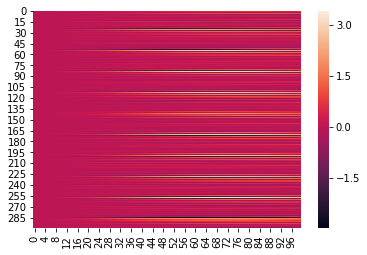

In [24]:
sns.heatmap(cwt(wave[:30000].reshape((1, -1)), np.arange(1, 101))[0])

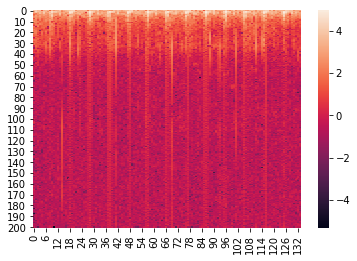

In [25]:
y = to_spect(wave[:60000].reshape((1, -1)), sr=4000, window_size=0.1, window_stride=0.075, window='hamming')[0]
y = (y - y.mean()).div(y.std()).transpose(0, 1)
sns.heatmap(y.numpy())

## Log-Mel spectrogram

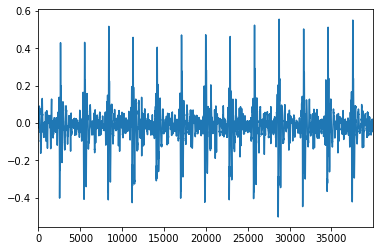

In [26]:
pd.Series(wave).plot()

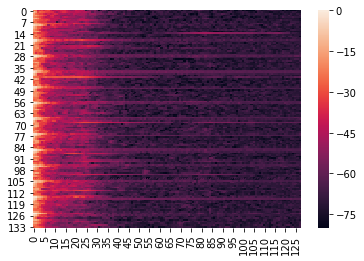

In [27]:
import librosa
y = logmel(wave[:60000].reshape((1, -1)), sr=4000, window_size=0.1, window_stride=0.075, window='hamming')[0]
# y = (y - y.mean()).div(y.std()).transpose(0, 1)
sns.heatmap(y.numpy())

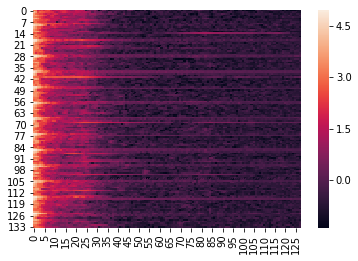

In [28]:
import librosa
y = logmel(wave[:60000].reshape((1, -1)), sr=4000, window_size=0.1, window_stride=0.075, window='hamming')[0]
y = (y - y.mean()).div(y.std())
sns.heatmap(y.numpy())

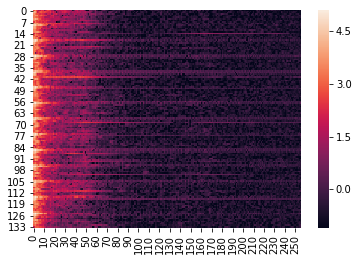

In [44]:
n_mels = 256
y = logmel(wave[:60000].reshape((1, -1)), sr=4000, window_size=0.1, window_stride=0.075, window='hamming', n_mels=n_mels)[0]
y = (y - y.mean()).div(y.std())
sns.heatmap(y.numpy())

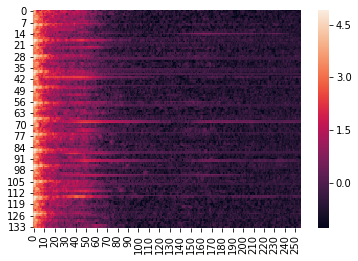

In [43]:
n_mels = 256
y = logmel(wave[:60000].reshape((1, -1)), sr=4000, window_size=0.2, window_stride=0.075, window='hamming', n_mels=n_mels)[0]
y = (y - y.mean()).div(y.std())
sns.heatmap(y.numpy())

In [53]:
wave.shape

(40000,)

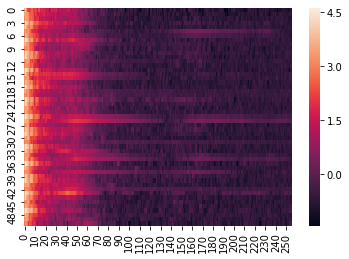

In [52]:
n_mels = 256
y = logmel(wave.reshape((1, -1)), sr=4000, window_size=0.5, window_stride=0.2, window='hamming', n_mels=n_mels)[0]
y = (y - y.mean()).div(y.std())
sns.heatmap(y.numpy())

In [54]:
train = pd.read_csv(DATA_DIR / 'train_manifest.csv', header=None)
wave_30, _ = load(train.iloc[0, 0], sr=4000)

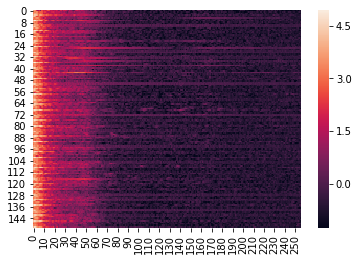

In [57]:
n_mels = 256
y = logmel(wave_30.reshape((1, -1)), sr=4000, window_size=0.2, window_stride=0.2, window='hamming', n_mels=n_mels)[0]
y = (y - y.mean()).div(y.std())
sns.heatmap(y.numpy())

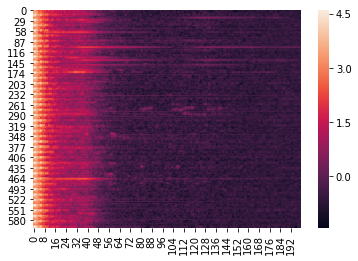

In [78]:
n_mels = 200
y = logmel(wave_30.reshape((1, -1)), sr=4000, window_size=0.5, window_stride=0.05, window='hamming', n_mels=n_mels)[0]
y = (y - y.mean()).div(y.std())
sns.heatmap(y.numpy())

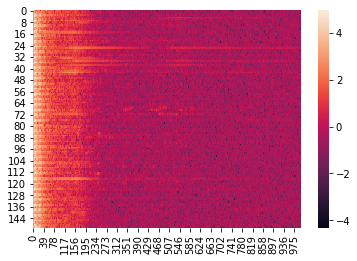

In [68]:
y = to_spect(wave_30.reshape((1, -1)), sr=4000, window_size=0.5, window_stride=0.2, window='hamming')[0]
y = (y - y.mean()).div(y.std())
sns.heatmap(y.numpy())